In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('database.sqlite') #making connection from python to sqlitedatabase

In [3]:
type(conn)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('select * from Reviews',conn) #reading sql query from Db

In [5]:
df.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [6]:
df.shape

(568454, 10)

In [8]:
pwd

'/Users/abc/Desktop/MyPc/Desktop/anaconda/Amazon_Cust_Data_Project'

### task1 = Perform sentiment analysys on data

In [7]:
df['Summary'].isnull().sum().any()

False

In [8]:
from textblob import TextBlob


In [9]:
text = df['Summary'][0]
text

'Good Quality Dog Food'

In [10]:
TextBlob(text).sentiment.polarity

0.7

In [11]:
polarity = []

for i in df['Summary']:
    polarity.append(TextBlob(i).sentiment.polarity)


In [12]:
len(polarity)

568454

In [13]:
data = df.copy()
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [14]:
data['Polarity'] = polarity

In [15]:
type(polarity)

list

In [16]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Polarity  
0       0.7  
1       0.0  
2       0.0

In [17]:
data.tail()

Id   ProductId          UserId              ProfileName  \
568449  568450  B001EO7N10  A28KG5XORO54AY         Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z            pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH  Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                 srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  Polarity  
568449  Great for sesame chicken..this is a good if no...      0.00  
568450  I'm disappointed with the flavor. The chocolat...     -0.75  
568451  These stars are small, so you can give 10-15 o...      1.00  
568452  These are the BEST treats for training and rew...      0.50  
568453  I am very satisfied ,product is as advertised,...      0.80

In [18]:
total_text = ' '.join(data['Summary'])
total_text[:500]

'Good Quality Dog Food Not as Advertised "Delight" says it all Cough Medicine Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Yay Barley Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Strawberry Twizzlers - Yummy Lots of twizzlers, just what you expect. poor taste Love it! GREAT SWEET CANDY! Home delivered twizlers Always fresh TWIZZLERS'

In [19]:
len(total_text)

13896361

In [20]:
#remove punctuation
import re
total_text = re.sub('[^a-zA-Z]',' ',total_text)
total_text[:500]

'Good Quality Dog Food Not as Advertised  Delight  says it all Cough Medicine Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Yay Barley Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Strawberry Twizzlers   Yummy Lots of twizzlers  just what you expect  poor taste Love it  GREAT SWEET CANDY  Home delivered twizlers Always fresh TWIZZLERS'

In [21]:
#lower the case
total_text = total_text.lower()
total_text[:500]

'good quality dog food not as advertised  delight  says it all cough medicine great taffy nice taffy great   just as good as the expensive brands  wonderful  tasty taffy yay barley healthy dog food the best hot sauce in the world my cats love this  diet  food better than their regular food my cats are not fans of the new food fresh and greasy  strawberry twizzlers   yummy lots of twizzlers  just what you expect  poor taste love it  great sweet candy  home delivered twizlers always fresh twizzlers'

In [22]:
#remove extra space
total_text = re.sub(' +',' ',total_text)
total_text[:500]

'good quality dog food not as advertised delight says it all cough medicine great taffy nice taffy great just as good as the expensive brands wonderful tasty taffy yay barley healthy dog food the best hot sauce in the world my cats love this diet food better than their regular food my cats are not fans of the new food fresh and greasy strawberry twizzlers yummy lots of twizzlers just what you expect poor taste love it great sweet candy home delivered twizlers always fresh twizzlers delicious prod'

(-0.5, 399.5, 199.5, -0.5)

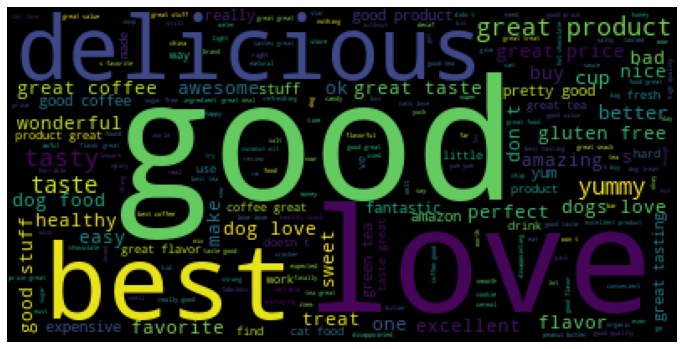

In [23]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)
plt.figure(figsize=(12,10))
mywordcloud = WordCloud(stopwords=stopwords).generate(total_text)
plt.imshow(mywordcloud)
plt.axis('off')

### Perform EDA for positive sentences

In [24]:
data_positive = data[data['Polarity']>0]

In [25]:
data_positive.shape

(331665, 11)

In [26]:
from wordcloud import WordCloud,STOPWORDS

In [27]:
stopwords = set(STOPWORDS)

In [28]:
text = (' '.join(data_positive['Summary']))
text[:5000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [29]:
#to clean text from dots.,exclamation,slashes
import re
text = re.sub('[^a-zA-Z]',' ',text)
text[:5000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [30]:
#remove extra spaces
text = re.sub(' +',' ',text)
text[:500]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Lov'

In [31]:
#lower casing the text
text = text.lower()
text[:500]

'good quality dog food great taffy nice taffy great just as good as the expensive brands wonderful tasty taffy healthy dog food the best hot sauce in the world my cats love this diet food better than their regular food my cats are not fans of the new food fresh and greasy love it great sweet candy always fresh delicious product great bargain for the price the best hot sauce in the world great machine best of the instant oatmeals good instant great irish oatmeal for those in a hurry satisfying lov'

(-0.5, 399.5, 199.5, -0.5)

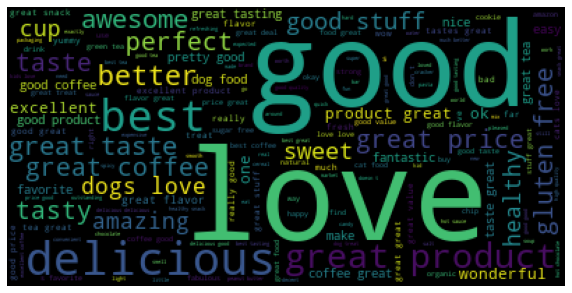

In [32]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

### perform eda on negative sentiments

In [33]:
data_negative = data[data['Polarity']<0]
data_negative.head()

Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
16  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                     0   
26  27  B001GVISJM  A3RXAU2N8KV45G          lady21                     0   
57  58  B004N5KULM   ASCNNAJU6SXF8         S. Beck                     1   
61  62  B004N5KULM   A7ZK2A3VIW7X9           Peggy                     0   
62  63  B001EO5TPM  A1E09XGZUR78C6   gary sturrock                     2   

    HelpfulnessDenominator  Score        Time                Summary  \
16                       0      2  1348099200             poor taste   
26                       1      1  1332633600        Nasty No flavor   
57                       1      5  1336176000  How can you go wrong!   
61                       2      5  1319414400       pretty expensive   
62                       2      1  1215302400         stale product.   

                                                 Text  Polarity  
16  I love eating them and they are good for watch...    -0.400  
26  The candy is just red , No flavor . Just  plan...    -1.000  
57  It is chocolate, what can I say.  Great variet...    -0.625  
61  This bag of candy online is pretty expensive, ...    -0.125  
62  Arrived in 6 days and were so stale i could no...    -0.500

In [34]:
# putting in textform 
neg_text = ' '.join(data_negative['Summary'])
neg_text[:500]

"poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley's Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don't Waste Your Money Disappointe"

In [35]:
#to remove puntuation

neg_text = re.sub('[^a-zA-Z]',' ',neg_text)
neg_text[:500]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointe'

In [36]:
#lower the text
neg_text = neg_text.lower()
neg_text[:500]

'poor taste nasty no flavor how can you go wrong  pretty expensive stale product  bigger then other brands order only in cold weather bad disappointing my every day green tea broken bottle bottoms  tasteless but low calorie marley s mellow mood lite   half tea half lemonade nearly killed the cats changed formula makes cats sick     not a real tea mcclures bloody mary mix not good eukanuba puppy small breed dog food my everyday cup of tea disappointed sad outcome don t waste your money disappointe'

In [37]:
#remove extra space
neg_text = re.sub(' +',' ',neg_text)

In [38]:
neg_text[:500]

'poor taste nasty no flavor how can you go wrong pretty expensive stale product bigger then other brands order only in cold weather bad disappointing my every day green tea broken bottle bottoms tasteless but low calorie marley s mellow mood lite half tea half lemonade nearly killed the cats changed formula makes cats sick not a real tea mcclures bloody mary mix not good eukanuba puppy small breed dog food my everyday cup of tea disappointed sad outcome don t waste your money disappointed sugar i'

(-0.5, 399.5, 199.5, -0.5)

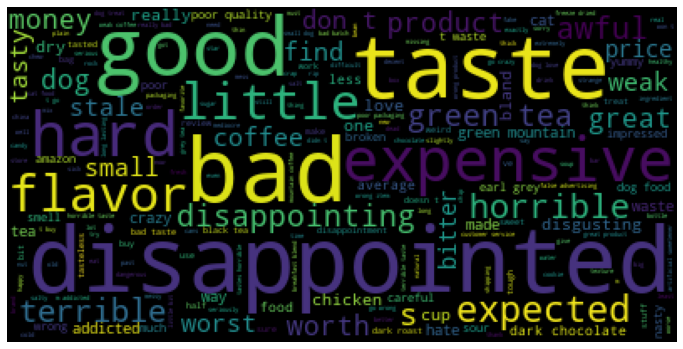

In [39]:
#construct the word cloud
plt.figure(figsize=(12,10))
word = WordCloud(stopwords=stopwords).generate(neg_text)
plt.imshow(word)
plt.axis('off')

### Analysis of recommendation of Amazon Top 10 Product Purchaser

In [40]:
df.head(2)

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...

In [41]:
#no.of products
df.ProductId.nunique()

74258

In [42]:
#no of users
df.UserId.nunique()

256059

In [43]:
raw = df.groupby('UserId').agg({'Summary' : 'count','Text' : 'count','Score': 'mean','ProductId':'count'})
raw

Summary  Text     Score  ProductId
UserId                                                
#oc-R103C0QSV1DF5E        1     1  5.000000          1
#oc-R109MU5OBBZ59U        1     1  5.000000          1
#oc-R10LFEMQEW6QGZ        1     1  5.000000          1
#oc-R10LT57ZGIB140        1     1  3.000000          1
#oc-R10UA029WVWIUI        1     1  1.000000          1
...                     ...   ...       ...        ...
AZZV9PDNMCOZW             3     3  4.666667          3
AZZVNIMTTMJH6             1     1  5.000000          1
AZZY649VYAHQS             1     1  5.000000          1
AZZYCJOJLUDYR             1     1  5.000000          1
AZZZOVIBXHGDR             1     1  2.000000          1

[256059 rows x 4 columns]

In [44]:
# sortby userid and in ascending order
raw = raw.sort_values(by = 'Text',ascending=False)

In [45]:
#renaming cols
raw.columns = ['num_summaries','num_text','cust_avg_score','num_product']

In [46]:
raw

num_summaries  num_text  cust_avg_score  num_product
UserId                                                              
A3OXHLG6DIBRW8            448       448        4.535714          448
A1YUL9PCJR3JTY            421       421        4.494062          421
AY12DBB0U420B             389       389        4.647815          389
A281NPSIMI1C2R            365       365        4.841096          365
A1Z54EM24Y40LL            256       256        4.453125          256
...                       ...       ...             ...          ...
A2HROKQO0GA5AF              1         1        3.000000            1
A2HROR28DMJV2W              1         1        5.000000            1
A2HRR8CO2Y20G8              1         1        5.000000            1
A2HRSML93IK9TR              1         1        5.000000            1
AZZZOVIBXHGDR               1         1        2.000000            1

[256059 rows x 4 columns]

In [47]:
user_10 = raw.index[0:10]
prod_10 = raw.num_product[0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

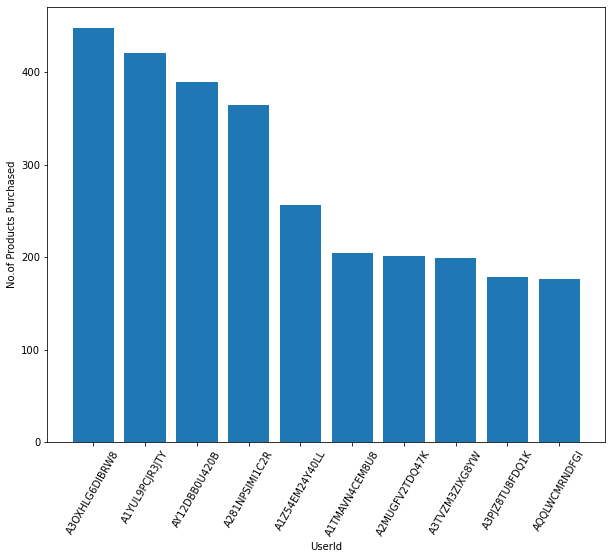

In [48]:
plt.figure(figsize=(10,8))
plt.bar(user_10,prod_10,label ='Top 10 Amazon User')
plt.xlabel('UserId')
plt.ylabel('No.of Products Purchased')
plt.xticks(rotation = 60)

### Analysing Cust comments lengthy or not

In [49]:
df.head(2)

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...

In [50]:
final = df[:20000]
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [51]:
#to check duplicay in data
final.duplicated().sum()

0

In [52]:
#to check null values
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [53]:
len(final.Text)

20000

In [54]:
# to split the text with space
a = df.Text[0].split(' ')
a

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [55]:
def cal_len(put_text):
    return len(put_text.split(' '))

In [56]:
final['text_len'] = final.Text.apply(cal_len)
final.head(2)


Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  text_len  
0  I have bought several of the Vitality canned d...        49  
1  Product arrived labeled as Jumbo Salted Peanut...        31

In [57]:
import plotly.express as px

In [58]:
px.box(final,y = 'text_len')

<AxesSubplot:xlabel='Score', ylabel='count'>

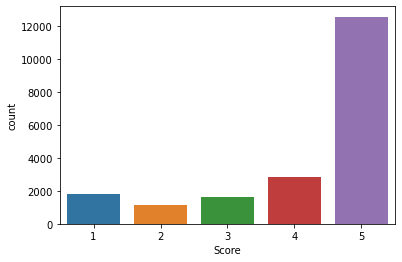

In [59]:
sns.countplot('Score',data = final)

### Analysing Customer Behaviour

In [60]:
final.tail(2)

Id   ProductId          UserId   ProfileName  HelpfulnessNumerator  \
19998  19999  B002C50X1M  A17TPOSAG43GSM       Herrick                     0   
19999  20000  B002C50X1M  A3LWC833HQIG7J  austin_Larry                     0   

       HelpfulnessDenominator  Score        Time  \
19998                       0      3  1303171200   
19999                       0      5  1295568000   

                                                 Summary  \
19998       Pretty good, but prefer other jalapeno chips   
19999  Excellent chips, full of flavor and just the r...   

                                                    Text  text_len  
19998  I was expecting some "serious flavor" as it wa...        89  
19999  I purchased the Salt and Vinegar chips and hav...        98

In [61]:
final['Text'][164]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

In [62]:
final['Text'] = final.Text.str.lower()


In [63]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
#remove punctuation
def remove_punc(text):
    nopun_text = ''.join([char for char in text if char not in string.punctuation])
    return nopun_text

final['Text'] = final['Text'].apply(remove_punc)

In [66]:
final['Text'][164]

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [67]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
final['Text'] = final['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [69]:
final['Text'].head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [70]:
#to check is there any https links in text
final['Text'].str.contains('http').sum()


433

In [71]:
final.Text

0        bought several vitality canned dog food produc...
1        product arrived labeled jumbo salted peanutsth...
2        confection around centuries light pillowy citr...
3        looking secret ingredient robitussin believe f...
4        great taffy great price wide assortment yummy ...
                               ...                        
19995    deep river salt vinegar chips thick crunchy ta...
19996    skeptical buying brand chips never tasted much...
19997    turn name brands give try although maui onion ...
19998    expecting serious flavor advertised bag compar...
19999    purchased salt vinegar chips pleased right amo...
Name: Text, Length: 20000, dtype: object

In [72]:
pd.set_option('display.max_rows',200)


In [73]:
#to check is there any https links in text
final['Text'].str.contains('http')

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Text, Length: 20000, dtype: bool

In [74]:
final['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [75]:
# removing URL from  anywhere in the data
def remove_url(sentence):
    urlpatter = re.compile(r'href|http.\w+')
    return urlpatter.sub('',sentence)

In [76]:
final['Text'] = final['Text'].apply(remove_url)
final['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [77]:
def rem_num(number):
    num = re.compile(r'\d+')
    return num.sub('',number)

In [78]:
final['Text'] = final['Text'].apply(rem_num)
final['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers ounce bag well worth price  strawberry ounce bags pack a'

In [79]:
for i in range(len(final['Text'])):
    final['Text'][i] = final['Text'][i].replace('br','')

In [80]:
comment = ' '.join(final['Text'])

(-0.5, 399.5, 199.5, -0.5)

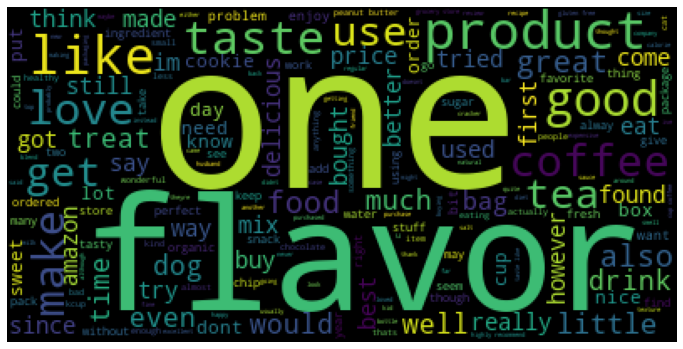

In [81]:
#construct the word cloud
plt.figure(figsize=(12,10))
word = WordCloud(stopwords=stop).generate(comment)
plt.imshow(word)
plt.axis('off')